# poplocavanje


Oblast $G$ $x\over y$

In [1]:
#!pip install --upgrade protobuf
#!pip install shapely descartes

In [68]:
%matplotlib inline
from shapely.geometry import Point
from numpy.linalg import inv
from math import sqrt

In [152]:
from matplotlib import pyplot as plt
from shapely.geometry import Polygon
from shapely.affinity import affine_transform
from descartes.patch import PolygonPatch
import numpy as np
from math import sin, cos, pi

# afine transformacije predstavljamo homogenim koordinatama

def transl(tx,ty):
    return np.array([
	[ 1,  0,  tx],
	[ 0,  1,  ty],
	[ 0,  0,  1] 
    ])

def rot0(fi):
    return np.array([
	[ cos(fi),  sin(fi),  0],
	[-sin(fi),  cos(fi),  0],
	[       0,        0,  1] 
    ])

def reflX():
    return np.array([
	[ 1,  0,  0],
	[ 0,  -1,  0],
	[ 0,  0,  1] 
    ])

def reflY():
    return np.array([
	[ -1,  0,  0],
	[ 0,  1,  0],
	[ 0,  0,  1] 
    ])

def refldX(y, dy):
    return transl(0,y)@reflY@transl(0,-y)@transl(0,dy)
def refldY(x,dx):
    return transl(x,0)@reflX@transl(-x,0)@transl(dx,0)

def rot(fi, cx, cy):
    return transl(cx, cy) @  rot0(fi) @ transl(-cx, -cy)

def sim0(x,y):
    return rot(pi,x,y)

def glrefY(y,dy,dx):
    return refldX(y,dy)@transl(dx,0)
def gledfX(x,dx,dy):
    return refldx(x,dx)@transl(0,dy)


def affine_h(geom, m):
    return affine_transform(geom, [m[0,0],m[0,1],m[1,0],m[1,1],m[0,2],m[1,2]])

I = transl(0,0)
def izom(vr,arg):
    if(vr == "p1"):
        tr1 = transl(arg[0], arg[1])
        tr2 = transl(arg[2], arg[3])
        return [I,tr1,tr2,inv(tr1), inv(tr2)]
    if(vr == "p31m"):
        r1 = rot(pi/3, arg[0], arg[1])
        r2 = rot(2*pi/3, arg[2], arg[3])
        return [I,r1,r2,inv(r1), inv(r2)]
    
    if(vr == "p2"):
        s1 = sim0(arg[0], arg[1])
        s2 = sim0(arg[2], arg[3])
        s3 = sim0(arg[4], arg[5])
        s4 = sim0(arg[6], arg[7])
        return [I,s1,s2,s3,s4]
    
    if(vr == "pm_h"):
        return [I, refldY(arg[0], arg[1]), refldY(arg[0], -arg[1])]
    
    if(vr == "pgg"):
        s1 = sim0(arg[0], arg[1])
        s2 = sim0(arg[2], arg[3])
        return [I,s1,s2]
    


In [148]:
#pop_p31m = izom("p31m", [0,0,0.5,sqrt(3)/6])
#pop_p31m = izom("p1", [0,1,1,0])
pop_p31m = izom("pgg", [0,0,0,0.5])


ax = plt.axes()

p1 = Polygon([(1,2), (1.5, 2.5), (2, 2), (2.5, 2.5), (3, 2), (2,1)])
#patch = PolygonPatch(p1, facecolor='#ffff00', edgecolor='#ff0000', alpha=0.5, zorder=2)
#ax.add_patch(patch)
for i in range(12):
    for j in range(12):
        p2 = affine_h(p1, pop(i-6,j-6))
        patch = PolygonPatch(p2, facecolor='#ff0000', edgecolor='#ff0000', alpha=0.7, zorder=2)
        ax.add_patch(patch)
p0 = Polygon([(0,0), (3,4), (3,8), (0,4)])

patch = PolygonPatch(p0, facecolor='#0000ff', edgecolor='#6699cc', alpha=0.5, zorder=2)
ax.add_patch(patch)
for i in range(12):
    for j in range(12):
        p2 = affine_h(p0, pop(i-6,j-6))
        patch = PolygonPatch(p2, facecolor='#0000ff', edgecolor='#000000', alpha=0.2, zorder=2)
        ax.add_patch(patch)
ax.set_xlim(-10,10)
ax.set_xticks(range(-10,10))
ax.set_ylim(-10,10)
ax.set_yticks(range(-10,10))
ax.set_aspect(1)
plt.show()


r1 = rot(pi/3, 0,0)
r2 = rot(2*pi/3, 0.5,sqrt(3)/6)
tr1 = Polygon([(0,0), (0.5,0),(0.5,sqrt(3)/6)])
tr2 = Polygon([(1,0), (0.5,0),(0.5,sqrt(3)/6)])
tr3 = Polygon([(1,0), (0,0),(0.5,sqrt(3)/6)])
kv = Polygon([(0.25,0),(0.5,0),(0.5,0.25),(0.25,0.25)])
r1i = inv(r1)
r2i = inv(r2)
I = r1@r1i
bx = plt.axes()

r = I
def popl(i):
    if i==5 :
        p1 = affine_h(tr1, r)
        patch = PolygonPatch(p1, facecolor='#ff0000', edgecolor='#ff0000', alpha=0.3, zorder=2)
        bx.add_patch(patch)
        p2 = affine_h(tr2, r)
        patch = PolygonPatch(p2, facecolor='#0000ff', edgecolor='#0000ff', alpha=0.3, zorder=2)
        bx.add_patch(patch)
        return 
    for q1 in [I,r1,r2,r1i,r2i]:
        r = r@q1  
        popl(i+1)   
    return
popl(0)
bx.set_xlim(-3,3)
bx.set_xticks(range(-3,4))
bx.set_ylim(-3,3)
bx.set_yticks(range(-3,4))
bx.set_aspect(1)
plt.show()


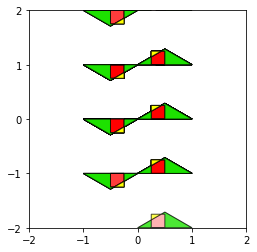

In [151]:

bx = plt.axes()
for q1 in pop_p31m:
    for q2 in pop_p31m:
        for q3 in pop_p31m:
            for q4 in pop_p31m:                
                    r = q1@q2@q3@q4
                    p1 = affine_h(tr3, r)
                    patch = PolygonPatch(p1, facecolor='#ff0000', edgecolor='#000000', alpha=0.3, zorder=2)
                    bx.add_patch(patch)
                    p2 = affine_h(kv, r)
                    patch = PolygonPatch(p2.difference(p1), facecolor='#ffff00', edgecolor='#000000', alpha=0.7, zorder=2)
                    bx.add_patch(patch)
                    patch = PolygonPatch(p1.difference(p2), facecolor='#00ff00', edgecolor='#000000', alpha=0.7, zorder=2)
                    bx.add_patch(patch)
                    


bx.set_xlim(-2,2)
bx.set_xticks(range(-2,3))
bx.set_ylim(-2,2)
bx.set_yticks(range(-2,3))
bx.set_aspect(1)
plt.show()